# Ciencia de datos
## Práctica 7. Regresión múltiple
### Alberto Benavides

Ahora, se comprobarán las relaciones existentes entre las múltiples características y los agrupamientos generados por $k$-medias a partir de los datos con los que se ha trabajado en prácticas anteriores

In [1]:
import pandas as pd

data = pd.read_csv("D:/FIME/Epidemia/Data/semanalesTodasKmeans.csv")
print(data.sample(3))

               m        f1        f2        f3        f4       ac1       ac2  \
53 -3.855778e-05  0.004167  0.012500  0.016667  0.029167  0.741248  0.742676   
98 -3.469620e-08  0.002083  0.004167  0.006250  0.437500  0.138975  0.213426   
63  6.894726e-06  0.055556  0.018519  0.351852  0.222222  0.246428  0.201992   

         ac4       ac8      ac16      ac32                       enf cie  \
53  0.586022  0.236282  0.147558 -0.029467          INFLUENZA A H1N1   J   
98  0.143331  0.177340  0.217480  0.113430         SIFILIS CONGENITA   A   
63  0.054887  0.107901  0.048868 -0.114340  TUMOR MALIGNO DE LA MAMA   C   

    cluster  
53        3  
98        4  
63        4  


Primero se aplica una prueba de mínimos cuadrados ordinarios a cada característica (excluidas el nombre de la enfermedad y el grupo de CIE al que pertenecen) con respecto al resto de las características

                            OLS Regression Results                            
Dep. Variable:                      m   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.041
Date:                Fri, 22 Mar 2019   Prob (F-statistic):              0.416
Time:                        19:23:40   Log-Likelihood:                 790.89
No. Observations:                 128   AIC:                            -1558.
Df Residuals:                     116   BIC:                            -1524.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.431e-05      0.000      0.309      0.7

<Figure size 432x288 with 0 Axes>

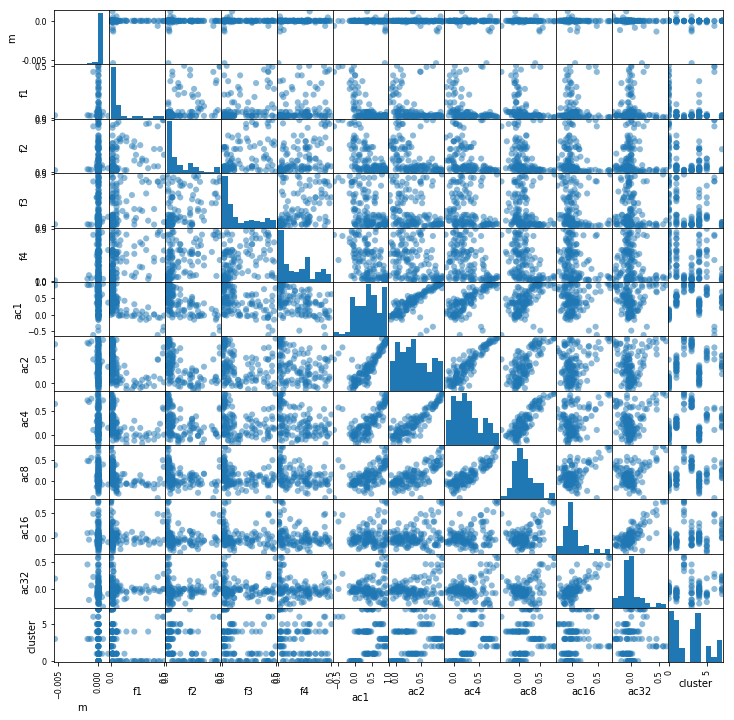

In [48]:
import statsmodels.api as sm

features = data
features = features.loc[:, features.columns != 'enf']
features = features.loc[:, features.columns != 'cie']
for column in features:
    y = features[column]
    # https://stackoverflow.com/a/29763653
    x = features.loc[:, features.columns != column]
    x = sm.add_constant(x)
    m = sm.OLS(y, x).fit() 
    print(m.summary())

import matplotlib.pyplot as plt
fig = plt.figure()
pd.plotting.scatter_matrix(features, figsize = (12, 12), s = 150) 
plt.show()
plt.close(fig)

# Predicción
# https://www.statsmodels.org/devel/examples/notebooks/generated/ols.html

Esta prueba muestra que las autocorrelaciones con retraso de 4 semanas (un mes) presentan el mejor ajuste $R^2$ respecto al resto de las características, además que del conjunto de las características resultan (significativas)[https://www.investopedia.com/terms/t/t-test.asp] las autocorrelaciones con retraso de 1, 2 y 8 semanas y el segundo coeficiente de Fourier con $P(t) < 0.05$. Pese a ello, el conjunto de características resultan significativas con respecto al (estadístico $F$)[http://efavdb.com/interpret-linear-regression/]. Todo esto parece indicar que se pueden predecir las autocorrelaciones mensuales principalmente a partir de las características mencionadas.

En cuanto a la predicción del grupo principal de la CIE, se tiene

In [25]:
import numpy as np

classnames, indices = np.unique(data.cie, return_inverse=True)
y = indices
# https://stackoverflow.com/a/29763653
x = features
x = sm.add_constant(x)
m = sm.OLS(y, x).fit() 
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     1.837
Date:                Fri, 22 Mar 2019   Prob (F-statistic):             0.0500
Time:                        19:01:17   Log-Likelihood:                -410.04
No. Observations:                 128   AIC:                             846.1
Df Residuals:                     115   BIC:                             883.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5899      2.867     -0.903      0.3

Con esto, se puede observar que las características seleccionadas no son estadísticamente significativas para asignar series de tiempo de enfermedades a un grupo de CIE específico. Sin embargo, y sólo por comprobar,

In [31]:
y = data.cluster
# https://stackoverflow.com/a/29763653
x = features
x = sm.add_constant(x)
m = sm.OLS(y, x).fit() 
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                cluster   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.691e+31
Date:                Fri, 22 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:11:57   Log-Likelihood:                 4204.0
No. Observations:                 128   AIC:                            -8382.
Df Residuals:                     115   BIC:                            -8345.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.261e-15   6.34e-16     -5.143      0.0

resulta evidente para la definición de agrupamientos por $k$-medias, se tiene el mejor ajuste y resultan significativas la mayoría de las características con $P(t) < 0.05$, excepto el cuarto mayor coeficiente de Fourier, y las autocorrelaciones con retraso de 2 y 16 semanas.